# **스테이지 6. 앙상블 모델**

🎈피쳐엔지니어링도 마무리를 했으니 3가지 모델링을 만들어 성능비교를 해볼게요!<br>
가장 좋은 성능을 내는 모델로 최종 테스트 평가를 할 예정입니다.<br>
가장 좋은 모델은 없지만 가장 알맞는 모델은 찾을 수 있습니다.<br>
그래서 여러가지 모델을 통해 다양하게 학습을 시켜 테스트를 해볼 필요가 있지요!🎯<br>

### *앙상블 기법

앙상블 기법을 통해 여러개의 모델로 가장 정확한 값으로 최종예측을 해봅시다! <br>
강력한 하나의 모델을 사용하는 것 보다 약한 모델 여러개를 사용하여 더 정확한 예측에 도움을 줍니다. <br>
앙상블 기법의 종류에는 보팅(Voting),배깅(Bagging),부스팅(Boosting) 3가지가 유형으로 나눌 수 있습니다.<br>
그럼 하나씩 살펴볼까요?<br>

### 보팅(Voting)
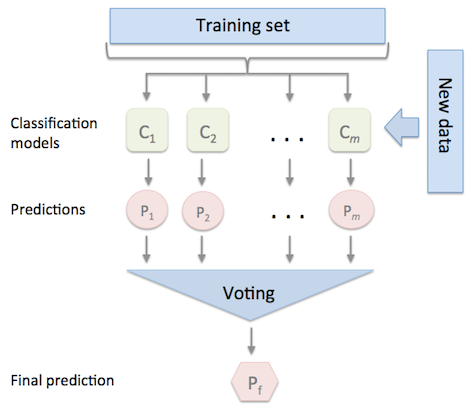

출처 https://codingsmu.tistory.com/151#%EB%B-%B-%EA%B-%---Bagging%-B%--Bootstrap%--aggregating-

보팅은 그 단어에서 알 수 있듯이, 서로 다른 알고리즘을 가진 분류기 중 투표를 통하여<br>
최종 예측 결과를 결정하는 방식입니다. 알고리즘에는 흔히 알고 있는 결정트리(Decision tree)나<br>KNN(K-Nearest Neighbor),로지스틱(Logistic) 같은 걸 의미합니다.<br>

보팅은 최종 결과 선정 방식에 따라 하드 보팅(Hard Voting),소프트 보팅(Soft voting)두가지로 나뉩니다.

### 배깅(Bagging,Bootstrap aggregating)
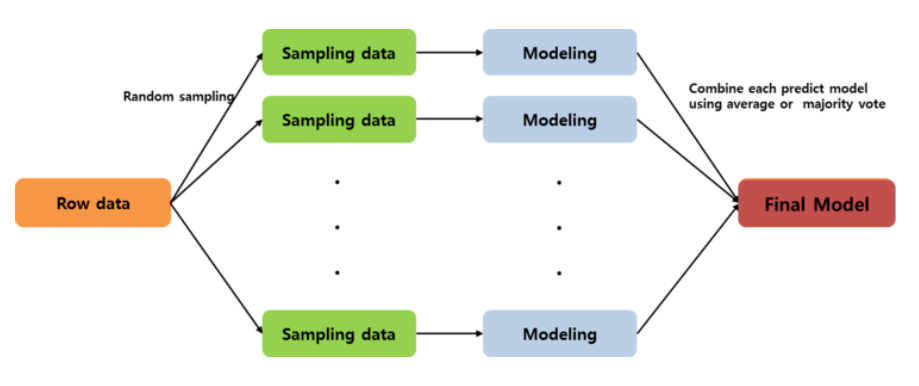
출처 https://codingsmu.tistory.com/151#%EB%B-%B-%EA%B-%---Bagging%-B%--Bootstrap%--aggregating-

배깅은 bootstrap aggregating 의 줄임말로 주어진 데이터에 대해서 여러개의 bootstrap 자료를 <br>
생성하고 각 자료를 모델링한 후 결합하여 최종 예측 모형을 산출하는 방법입니다!<br>

이 때 bootstrap 자료란 원시 데이터(raw)로 부터 복원 임의 추출한 크기가 동일한 여러 개의<br> 표본 자료를 말합니다. 보팅과는 다르게 모두 같은 알고리즘 모델을 사용합니다.<br>

대표적으로 랜덤 포레스트 알고리즘을 사용하여 과적합(Overfitting) 방지에 효과적이며 수행속도가 빠른 장점을 가지고 있어요!

### 의사결정나무
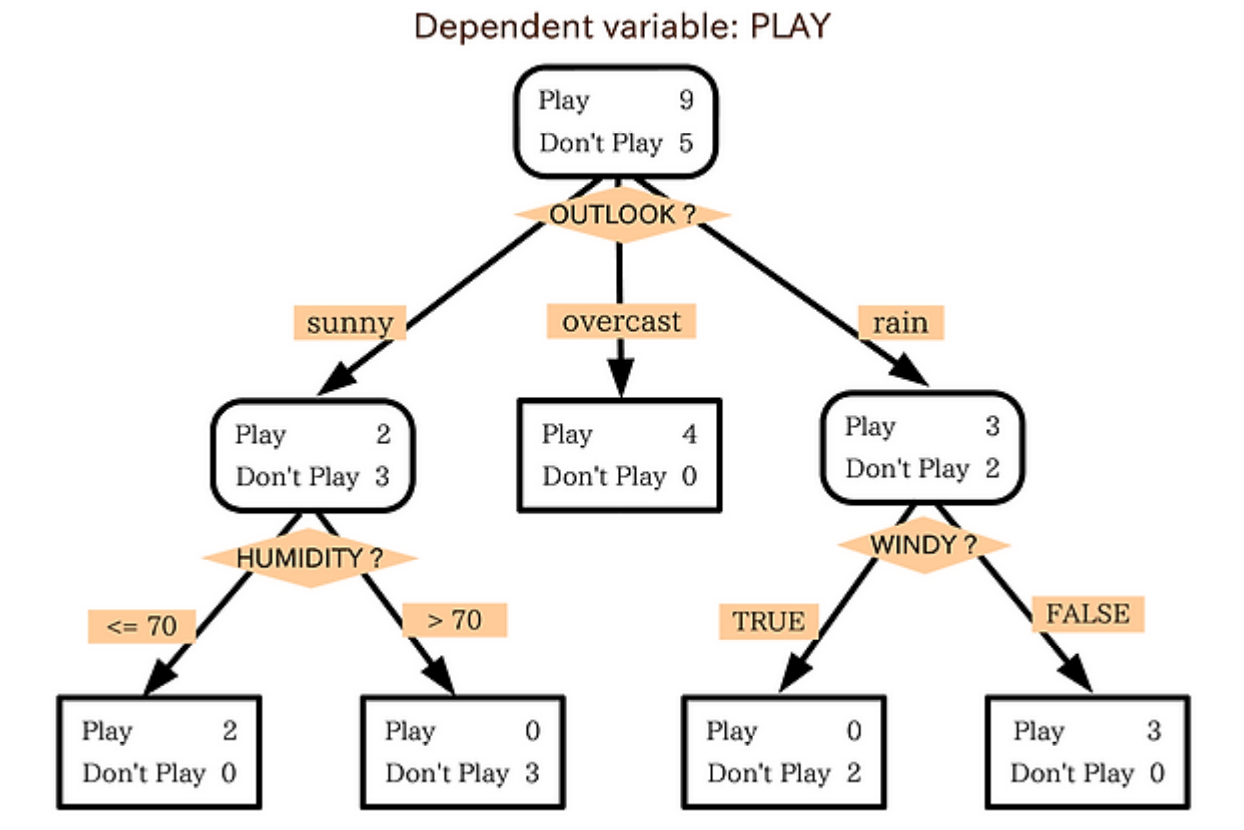
[출처]https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

**의사결정나무** 는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한<br>
규칙들의 조합으로 나타내며, 그 모양이 '나무' 와 같다고해서 의사결정 나무라 불려요!<br>
질문을 던져서 대상을 좁혀나가는 '스무고개' 와 같은 개념입니다.!<br>

##### 의사결정나무는 분류와 회귀 모두 가능합니다. <br>범주나 연속형 수치 모두 예측할 수 있다는 말 입니다.

코드실행을 직접해보도록 하겠습니다!
먼저 필요한 라이브러리들을 모두 import 해줄게요

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
train = pd.read_csv('./data/spoiler_train.csv')
test = pd.read_csv('./data/spoiler_test.csv')

In [4]:
print(test)

      index gender car reality  child_num  income_total           income_type   
0     26457      M   Y       N          0      112500.0             Pensioner  \
1     26458      F   N       Y          0      135000.0         State servant   
2     26459      F   N       Y          0       69372.0               Working   
3     26460      M   Y       N          0      112500.0  Commercial associate   
4     26461      F   Y       Y          0      225000.0         State servant   
...     ...    ...  ..     ...        ...           ...                   ...   
9995  36452      F   Y       Y          0      202500.0               Working   
9996  36453      M   Y       Y          0      202500.0               Working   
9997  36454      F   N       Y          0      292500.0               Working   
9998  36455      F   Y       N          0      180000.0  Commercial associate   
9999  36456      F   N       Y          0      270000.0               Working   

                           

In [5]:
print(train['credit'].value_counts()) #train['credit']을 value_counts()를 확인해보니 0,1,2 3가지로 나뉘어져 있네요

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64


train 데이터를 기반으로 학습데이터와 검증데이터의 비율을 7 :3으로 분리하여<br>
train과 validation으로 분리합니다. 이때 stratify를 통해 데이터가 타깃 <br>
클래스의 비율을 반영하도록 설정합니다.

In [6]:
print(train.dtypes)

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH       float64
DAYS_EMPLOYED    float64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = train.select_dtypes(include=['object']).columns
for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [13]:
X = train.drop(columns='credit')
y = train['credit']

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X,y,stratify=y , test_size= 0.2, random_state=42)

#사이킷런의 DecisionTreeClassifier로 모델 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

predict 메서드에 x_test 값을 주어 예측값을 pred 변수에 저장하겠습니다.
의사결정나무의 평가지표를 다양하게 출력하여 성능확인을 해볼게요!

**average:  다중 클래스 분류에서 사용되는 평균 방법을 지정하는 매개변수입니다.**



### -- 주요 average 옵션 --

None: 클래스별로 평가 지표를 계산하고 개별 클래스마다 값을 반환합니다. 이 경우 클래스마다 리콜, 정밀도, F1 스코어 등을 계산한 값을 반환합니다.

'micro': 모든 클래스의 TP, FP, FN을 모두 더하여 전체 데이터에 대한 평가 지표를 계산합니다. 전체 데이터에 대한 하나의 평가 지표 값을 얻을 수 있습니다.

'macro': 각 클래스마다 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다. 클래스의 개수에 상관없이 각 클래스의 영향력을 동일하게 취급합니다.

'weighted': 각 클래스마다 평가 지표를 계산한 뒤, 클래스의 샘플 수를 고려하여 가중 평균을 계산하여 전체 평가 지표 값을 계산합니다. 클래스별 샘플 수가 다른 경우 유용합니다.

'samples': 다중 레이블 분류에서 사용되며, 각 샘플에 대해 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다.

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

pred_1 = dt.predict(x_valid)
valid_cm_1 = confusion_matrix(y_valid,pred_1)
valid_acc_1 = accuracy_score(y_valid,pred_1)
valid_recall_1 = recall_score(y_valid,pred_1, average='weighted')
valid_precision_1 = precision_score(y_valid,pred_1, average='weighted')
valid_f1_1 = f1_score(y_valid,pred_1, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_1)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_1*100,2))
print("Recall(재현율): ", round(valid_recall_1*100,2))
print("Precision(정밀도): ", round(valid_precision_1*100,2))
print("F1 Score(정밀도,리콜의 조화평균): ", round(valid_f1_1*100,2))



Confusion Matrix(혼동행렬): 
 [[ 169  153  322]
 [ 175  568  511]
 [ 425  591 2378]]


Accuracy(정확도):  58.86
Recall(재현율):  58.86
Precision(정밀도):  60.43
F1 Score(정밀도,리콜의 조화평균):  59.58
